**Time Series Forecasting**

**Importing Useful LIbraries And Loading The data**

In [ ]:
# 📦 Install required packages
!pip install -q pandas numpy matplotlib scikit-learn tensorflow keras-tcn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from tcn import TCN

# 📊 Load data
url = 'https://raw.githubusercontent.com/mkumakech/Covid-19_Pandemic/refs/heads/master/kano%20(1).csv'
df = pd.read_csv(url)
df.head()


,State,Confirmed,Discharged,Death,Date
0,Kano,92,0,0,01/05/2020
1,Kano,2,7,3,02/05/2020
2,Kano,29,0,0,03/05/2020
3,Kano,23,0,2,04/05/2020
4,Kano,32,3,3,05/05/2020


**Plotting The General Graph**

<Figure size 10000x900 with 0 Axes>

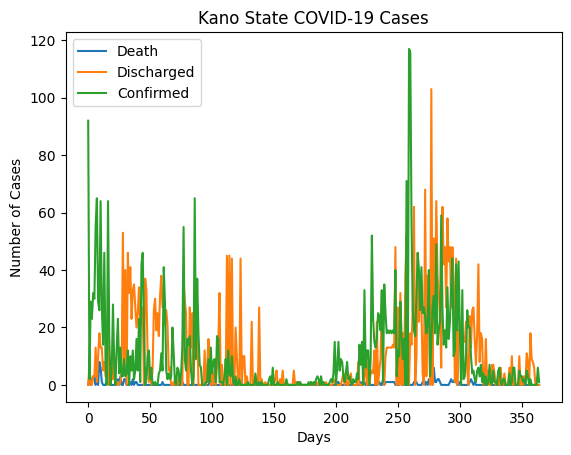

In [ ]:
plt.figure(figsize=(100, 9))
df = df[['Death', 'Discharged', 'Confirmed']]
df.plot(title='Kano State COVID-19 Cases')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
df.dtypes

,0
Death,int64
Discharged,int64
Confirmed,int64


**Normalizing and Splitting the Data**

In [ ]:
# 🔧 Normalize and split
scalers = {}
scaled_data = {}
for col in df.columns:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[[col]])
    scalers[col] = scaler
    scaled_data[col] = scaled

def create_dataset(dataset, time_step=7):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])
    return np.array(X), np.array(y)

time_step = 7
X_all, y_all = {}, {}
for key in scaled_data:
    X_all[key], y_all[key] = create_dataset(scaled_data[key], time_step)

# Split into train/test
def split_data(X, y, train_ratio=0.8):
    size = int(len(X) * train_ratio)
    return X[:size], X[size:], y[:size], y[size:]

splits = {}
for key in X_all:
    splits[key] = split_data(X_all[key], y_all[key])


**Buildind the Algorithm for Prediction LSTM,GRU,CNN,TCN**

In [ ]:
def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(32),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        GRU(32),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

def build_cnn(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

def build_tcn(input_shape):
    model = Sequential([
        TCN(input_shape=input_shape),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model


**Training And Testing the Models**

Training LSTM for Death


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step


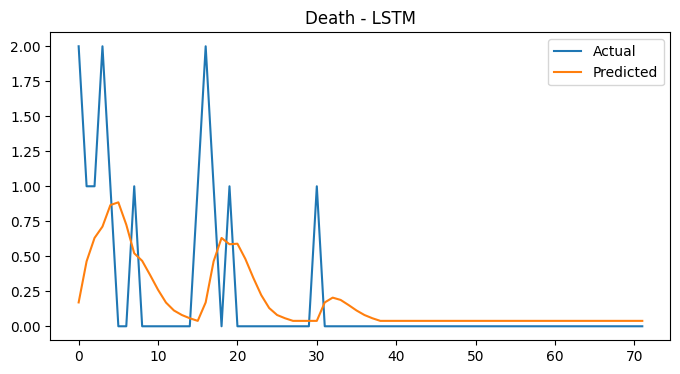

Training GRU for Death


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


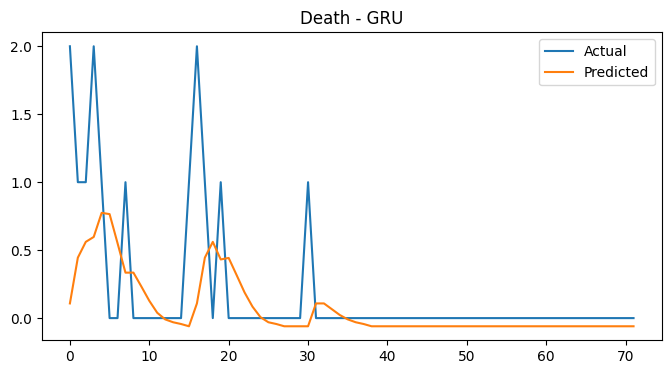

Training CNN for Death


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


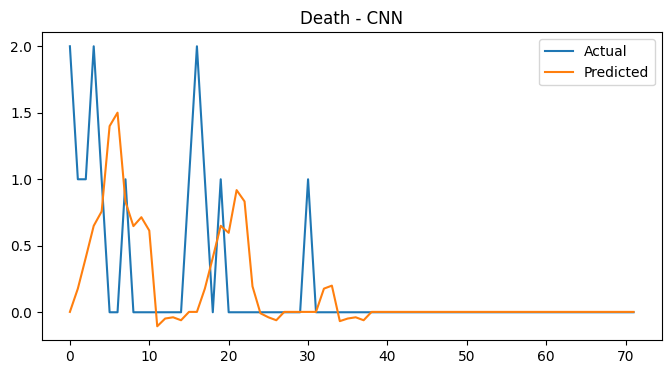

Training TCN for Death


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step


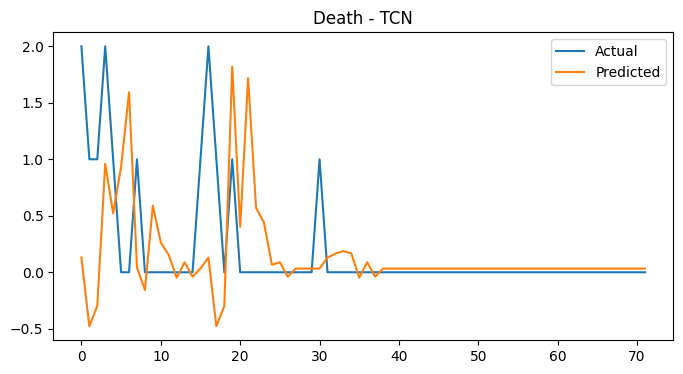

Training LSTM for Discharged


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step


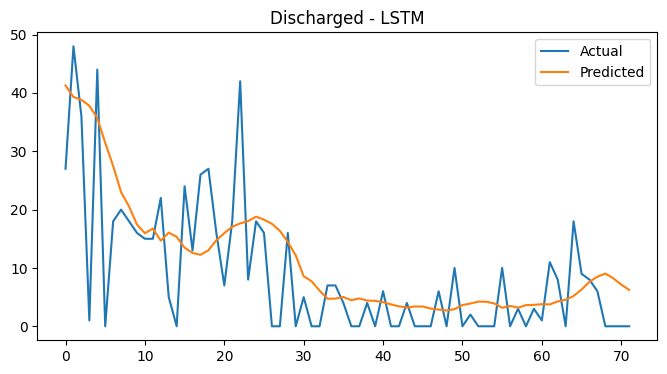

Training GRU for Discharged


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


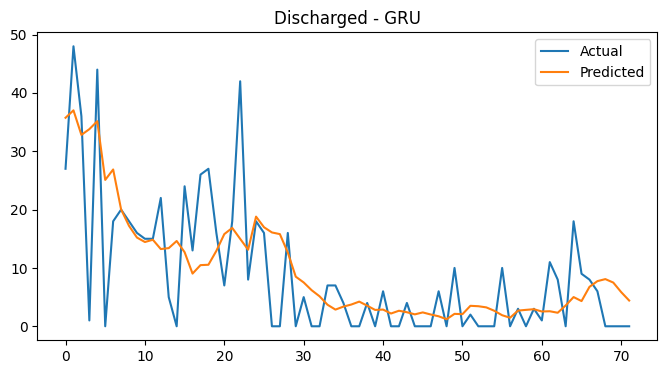

Training CNN for Discharged


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


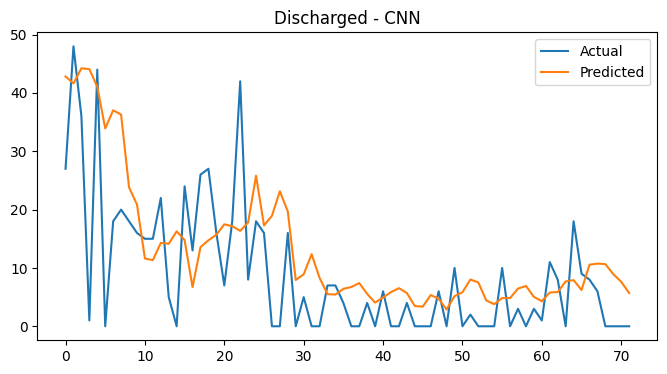

Training TCN for Discharged


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step


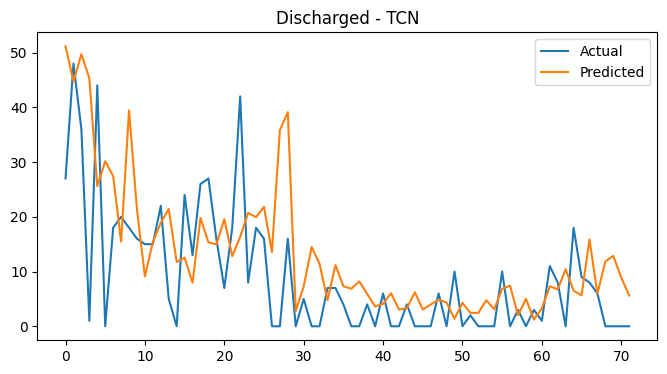

Training LSTM for Confirmed


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


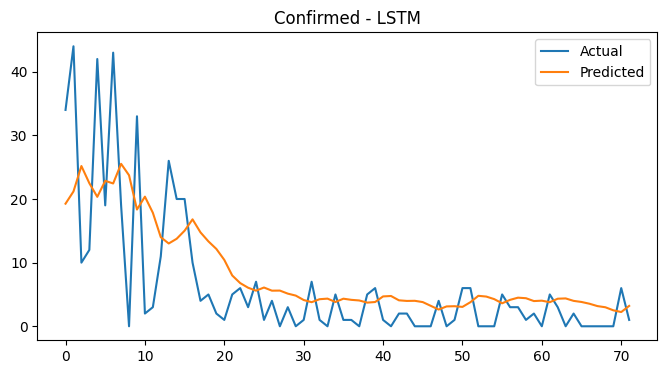

Training GRU for Confirmed


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


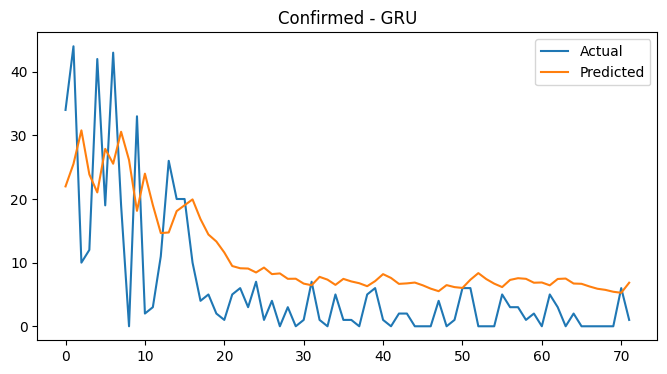

Training CNN for Confirmed


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


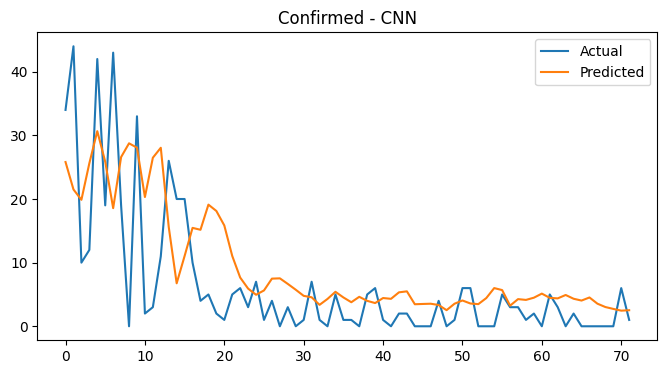

Training TCN for Confirmed


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step


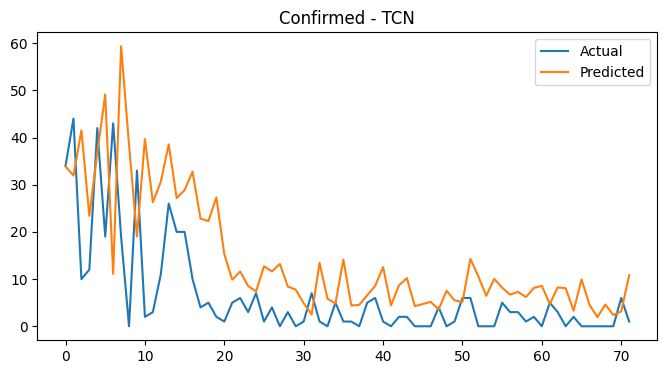

In [ ]:
results = {}
models = {'LSTM': build_lstm, 'GRU': build_gru, 'CNN': build_cnn, 'TCN': build_tcn}

for target in ['Death', 'Discharged', 'Confirmed']:
    X_train, X_test, y_train, y_test = splits[target]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    results[target] = {}
    for name, builder in models.items():
        print(f"Training {name} for {target}")
        model = builder((time_step, 1))
        model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=0)

        predictions = model.predict(X_test)
        predictions = scalers[target].inverse_transform(predictions)
        actual = scalers[target].inverse_transform(y_test)

        rmse = np.sqrt(mean_squared_error(actual, predictions))
        results[target][name] = {'rmse': rmse, 'predictions': predictions, 'actual': actual}

        # 📈 Plot
        plt.figure(figsize=(8,4))
        plt.plot(actual, label='Actual')
        plt.plot(predictions, label='Predicted')
        plt.title(f'{target} - {name}')
        plt.legend()
        plt.show()


**Results Prediction Interpretation**

In [ ]:
for target in results:
    print(f"\n{target} Prediction RMSE:")
    for model_name in results[target]:
        print(f"{model_name}: {results[target][model_name]['rmse']:.4f}")



Death Prediction RMSE:
LSTM: 0.4487
GRU: 0.4549
CNN: 0.5455
TCN: 0.5963

Discharged Prediction RMSE:
LSTM: 9.2713
GRU: 8.6480
CNN: 10.6402
TCN: 11.8140

Confirmed Prediction RMSE:
LSTM: 7.9446
GRU: 9.0874
CNN: 8.7660
TCN: 13.6493


**Results Interpretation**

In This Lab I utilized RMSE which is the Root mean Square Error --It Is a standard way to measure the accuracy of a model’s predictions—specifically, how much error there is between predicted values and actual value

Lower RMSE = Better performance (closer to zero means the predictions are more accurate).

Therfor in this Lab ;;
1. Death Prediction -- LSTM will be appropriate since it has the lowest RMSE value
2. Discharged Prediction -- GRU will be appropriate since it has the lowest RMSE value
3. Confirmed Prediction -- LSTM will be appropriate since it has the lowest RMSE value



